In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import statsmodels.api as sm
from matplotlib.ticker import PercentFormatter
import statistics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('drive/MyDrive/Colab/lab6new.csv', sep=',', na_values=".")
data 

,Batch 1,Batch 2
0,1.001,1.000
1,1.005,1.005
2,1.015,1.015
3,1.020,1.005
4,1.010,0.990
5,1.015,1.005
6,1.000,1.015
7,1.010,1.000
8,0.999,1.005
9,1.010,0.990


In [ ]:
x=data.to_numpy()
x

array([[1.00100005, 1.        ],
       [1.00499999, 1.00499999],
       [1.01499999, 1.01499999],
       [1.01999998, 1.00499999],
       [1.00999999, 0.99000001],
       [1.01499999, 1.00499999],
       [1.        , 1.01499999],
       [1.00999999, 1.        ],
       [0.99900001, 1.00499999],
       [1.00999999, 0.99000001],
       [0.99599999, 0.99699998],
       [1.        , 1.        ],
       [1.00399995, 1.00199997],
       [0.995     , 1.00100005],
       [1.00600004, 1.00600004],
       [0.98500001, 1.00499999],
       [1.00999999, 1.00999999],
       [1.        , 1.01499999],
       [0.995     , 1.        ],
       [1.        , 1.        ],
       [1.        , 1.01499999],
       [0.99900001, 0.995     ],
       [1.01400006, 1.00499999],
       [1.00899994, 1.00999999],
       [1.00499999, 1.00999999],
       [1.02499998, 1.00600004],
       [1.00399995, 0.99900001],
       [1.00399995, 1.00600004],
       [0.99900001, 1.00499999],
       [1.        , 1.00100005],
       [1.

In [ ]:
x_bar = []
r = []

In [ ]:
for group in x:
    x_bar.append(group.mean())
    r.append(group.max() - group.min())
#print(x_bar)
#print(r)
m=len(x_bar)
print('points in x, ', m)

points in x,  50


[Text(0, 0.5, 'Range'), Text(0.5, 0, 'Group')]

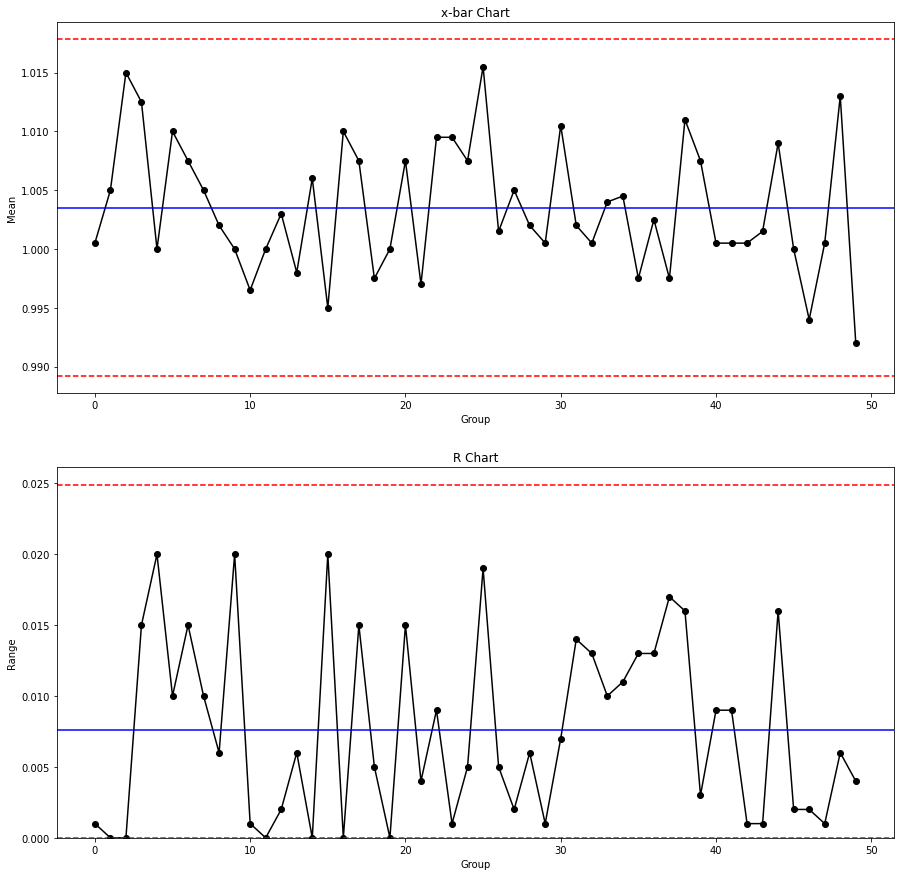

In [ ]:
# Plot x-bar and R charts
fig, axs = plt.subplots(2, figsize=(15,15))

# x-bar chart
# Chart parameters A2=0.577, D3, and D4 see the ref for other sample size
A2=1.88 #n=2
D3=0     #n=2
D4=3.267 #n=2

axs[0].plot(x_bar, linestyle='-', marker='o', color='black')
axs[0].axhline((statistics.mean(x_bar)+A2*statistics.mean(r)), color='red', linestyle='dashed')
axs[0].axhline((statistics.mean(x_bar)-A2*statistics.mean(r)), color='red', linestyle='dashed')
axs[0].axhline((statistics.mean(x_bar)), color='blue')
axs[0].set_title('x-bar Chart')
axs[0].set(xlabel='Group', ylabel='Mean')

# R chart
axs[1].plot(r, linestyle='-', marker='o', color='black')
axs[1].axhline((D4*statistics.mean(r)), color='red', linestyle='dashed')
axs[1].axhline((D3*statistics.mean(r)), color='red', linestyle='dashed')
axs[1].axhline((statistics.mean(r)), color='blue')
axs[1].set_ylim(bottom=0)
axs[1].set_title('R Chart')
axs[1].set(xlabel='Group', ylabel='Range')

In [ ]:
i = 0
control = True
for group in x_bar:
    if group > statistics.mean(x_bar)+A2*statistics.mean(r) or group < statistics.mean(x_bar)-A2*statistics.mean(r):
        print('Group', i, 'out of mean control limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')

All points within control limits.


In [ ]:
i = 0
control = True
for group in r:
    if group > D4*statistics.mean(r):
        print('Group', i, 'out of range cotrol limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')

All points within control limits.


In [ ]:
#create DataFrame
df = pd.DataFrame({'count': [29, 56, 15]})
df.index = ['Range 1', 'Range 2', 'Range 3']

#sort DataFrame by count descending
df = df.sort_values(by='count', ascending=False)

#add column to display cumulative percentage
df['cumperc'] = df['count'].cumsum()/df['count'].sum()*100

#view DataFrame
df

,count,cumperc
Range 2,56,56.0
Range 1,29,85.0
Range 3,15,100.0


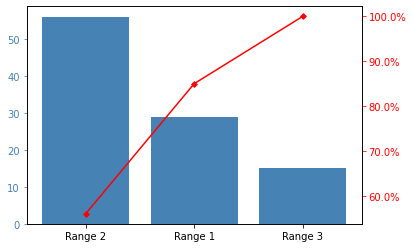

In [ ]:
#define aesthetics for plot
color1 = 'steelblue'
color2 = 'red'
line_size = 4

#create basic bar plot
fig, ax = plt.subplots()
ax.bar(df.index, df['count'], color=color1)

#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(df.index, df['cumperc'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

#specify axis colors
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

#display Pareto chart
plt.show()